In [4]:
!pip install gensim
!pip install spacy
!python3 -m spacy download pt_core_news_sm

  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [10]:
!spacy download pt_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [1]:
import spacy
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from pathlib import Path
from os import path
from spacy.lang.pt.examples import sentences 
from spacy.tokens import Doc
from collections import Counter

In [ ]:
outputCsv = 'buscape.csv'
outputFinal = "buscape_data.csv"
inputDataframe = "../input/ptbr-sentiment-analysis-datasets/buscape.csv"

In [7]:
# Load in the dataframe
df = pd.read_csv(inputDataframe, index_col=0)

oooo = df[["review_text"]]
aaaa = df["rating"]

print(oooo['review_text'])

0         ['produto', 'excepcional', 'recomendo', 'inova...
1         ['recebi', 'produto', 'antes', 'prazo', 'veio'...
2         ['ótmo', 'produto', 'atendeu', 'expectativas',...
3         ['gostei', 'produto', 'ótima', 'qualidade', 'f...
4         ['adorei', 'entrega', 'prazo', 'produto', 'con...
                                ...                        
148135    ['produto', 'imagem', 'possui', 'bluetooth', '...
148136    ['produto', 'imagem', 'possui', 'bluetooth', '...
148137    ['produto', 'imagem', 'possui', 'bluetooth', '...
148138    ['celular', 'bom', 'melhor', 'moto', 'plus', '...
148139    ['entrega', 'rápida', 'atende', 'expectativas'...
Name: comentario, Length: 148140, dtype: object


In [ ]:
# Rotina para criar a figura de como funciona o algoritmo
doc = nlp('Recomendo comprar. Loja entregou muito rápido')
from spacy import displacy
print(hghg[3])
svg = displacy.render(doc, style="dep",jupyter=True)
print(svg)
output_path = Path("exemplo.svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script 
#output_path.open("w", encoding="utf-8").write(svg)

In [27]:
nlp = spacy.load("pt_core_news_sm")
#print(df[['review_text_tokenized']].to_numpy())

haha = []
nene = df[['review_text_tokenized']].to_numpy()
for i in range(10):
    haha.append(nene[i][0])

hghg = []
#print(haha)
words = []
#haha = Doc.from_Array(haha)
#print(haha)
for i in range(10):
    doc = nlp(haha[i])
    hghg.append(doc)
    for token in doc:
        if (token.pos_ == 'NOUN'):
            words.append(token.text)
            #print(token.text, token.pos_, token.dep_)

#print(words)
#input list
input_list = words

#keys of the dictionary will be the unique items 
#print(Counter(input_list).keys())

#values will be the number of that key present in the list
#print(Counter(input_list).values())

#new list with key-value pairs
print(Counter(input_list))

#count of unique values
print("Count- ", len(Counter(input_list)))

Counter({'produto': 28570, 'site': 6520, 'americanas': 5902, 'dia': 4793, 'compra': 4115, 'dias': 3928, 'entrega': 3695, 'loja': 3638, 'liquidificador': 2770, 'mês': 2440, 'retorno': 2266, 'vez': 2109, 'qualidade': 1805, 'email': 1795, 'problemas': 1782, 'prazo': 1761, 'contato': 1759, 'satisfação': 1646, 'dinheiro': 1625, 'compras': 1604, 'reclamei': 1529, 'empresa': 1495, "'": 1483, 'maio': 1451, 'lojas': 1429, 'extorno': 1396, 'line': 1388, 'souza': 1377, 'adriana': 1372, 'duo': 1369, 'defeito': 1316, 'problema': 1289, 'troca': 1288, 'devolução': 1126, 'cliente': 1106, 'atendimento': 1000, 'resposta': 968, 'momento': 828, 'compro': 804, 'paguei': 799, 'falta': 772, 'data': 754, 'uso': 742, 'valor': 724, 'meses': 702, 'consumidor': 686, 'nota': 679, 'estorno': 664, 'filho': 633, 'mail': 595, 'volta': 593, 'aparelho': 591, 'marca': 587, 'tempo': 569, 'embalagem': 562, 'produtos': 549, 'caixa': 549, 'vezes': 546, 'respeito': 531, 'avaliação': 521, 'cancelamento': 516, 'casa': 513, 'par

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

result = Counter(output_list)

array = []
array2 = []
count = 0
for i, j in result.items():
    array.append(j)
    array2.append([i,j])
    count = count + 1
    
hyhy = pd.DataFrame(array2, columns=['palavra', 'quantidade'])

hyhy.to_csv(outputCsv)
plt.hist(array, bins = 100)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors
from gensim.test.utils import datapath
import re
import unicodedata
from tqdm import tqdm
import gensim
import multiprocessing
import random
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words('portuguese')
array = []
uy = oooo.to_numpy()
ay = aaaa.to_numpy()


for i in range(len(uy)):
    tmp = clean_data(str(uy[i][0]))
    
    array.append(tmp)

In [ ]:
cores= multiprocessing.cpu_count()
model = Word2Vec(min_count=5,window=5,vector_size=300,workers=cores-1,max_vocab_size=200000)

model.build_vocab(array)
vocab_len=len(model.wv.index_to_key)

model.train(array,total_examples=model.corpus_count,epochs=50)

model.wv.save_word2vec_format('gensim_w2v_model.bin',binary=True)

trained_model= KeyedVectors.load_word2vec_format('gensim_w2v_model.bin', binary=True)

In [ ]:
model.wv.key_to_index 

In [28]:
wordsPositive = ['brinquedo']
wordsNegative = ['casa']
positiveToy = trained_model.most_similar(positive=wordsPositive, topn=50)

toyPhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveToy)):
        if positiveToy[j][0] in array[i]:
            toyPhrases.append([array[i], 'brinquedo'])

positiveToy

NameError: name 'trained_model' is not defined

In [ ]:
wordsPositive = ['casa']
wordsNegative = ['casa']
positiveHome = trained_model.most_similar(positive=wordsPositive, topn=50)

homePhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveHome)):
        if positiveHome[j][0] in array[i]:
            homePhrases.append([array[i], 'casa'])

In [ ]:
wordsPositive = ['eletrodomestico']
wordsNegative = ['casa']
positiveElectro = trained_model.most_similar(positive=wordsPositive, topn=50)

electroPhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveElectro)):
        if positiveElectro[j][0] in array[i]:
            electroPhrases.append([array[i], 'eletrodomestico'])

In [ ]:
wordsPositive = ['comida']
wordsNegative = ['casa']
positiveFood = trained_model.most_similar(positive=wordsPositive, topn=50)

foodPhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveFood)):
        if positiveFood[j][0] in array[i]:
            foodPhrases.append([array[i], 'comida'])

In [ ]:
wordsPositive = ['carro']
wordsNegative = ['casa']
positiveCar = trained_model.most_similar(positive=wordsPositive, topn=50)

carPhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveCar)):
        if positiveCar[j][0] in array[i]:
            carPhrases.append([array[i], 'carro'])

In [ ]:
wordsPositive = ['computador']
wordsNegative = ['casa']
positiveComputer = trained_model.most_similar(positive=wordsPositive, topn=50)

computerPhrases = []
print(type(array))
for i in range(len(array)):
    for j in range(len(positiveComputer)):
        if positiveComputer[j][0] in array[i]:
            computerPhrases.append([array[i], 'computador'])

In [ ]:
fullData = toyPhrases + electroPhrases + foodPhrases + homePhrases + carPhrases + computerPhrases

with open(outputFinal, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(fullData)

######### Etapa 2 #########

In [1]:
# Bibliotecas extras necessárias
!pip install git+HTTPS://github.com/robsonpessoa/LeIA
!pip install prince --upgrade   

  Cloning https://github.com/robsonpessoa/LeIA to c:\users\yuri\appdata\local\temp\pip-req-build-9_04iio_
  Resolved https://github.com/robsonpessoa/LeIA to commit 88ef804df6123e9e91c0708cbed6ee31fb83678e


  Running command git clone -q https://github.com/robsonpessoa/LeIA 'C:\Users\Yuri\AppData\Local\Temp\pip-req-build-9_04iio_'


In [41]:
import re
import matplotlib
import pandas as pd
import seaborn as sn
import prince
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency

matplotlib.rcParams.update({'font.size': 16})

In [3]:
# Função para limpar os dados
def clean_data(w):
    w = w.lower()
    w=re.sub(r'[^\w\s]',' ',w)
    w=re.sub(r"([0-9])", r" ",w)
    return w

In [12]:
# Variáveis do algoritmo
input_dataframe = "out_tudo.csv"
output_csv = "tudo_final.csv"

alpha = 0.05 # significância

cBrinq = 84283 # Número de dados da categoria Brinquedo. Deixar 0 caso não exista a categoria
cCarro = 2636 # Número de dados da categoria Carro. Deixar 0 caso não exista a categoria
cCasa  = 13867 # Número de dados da categoria Casa. Deixar 0 caso não exista a categoria
cComid = 2963 # Número de dados da categoria Comida. Deixar 0 caso não exista a categoria
cCompu = 18572 # Número de dados da categoria Computador. Deixar 0 caso não exista a categoria
cEletr = 25819 # Número de dados da categoria Eletrodoméstico. Deixar 0 caso não exista a categoria

In [4]:
data = pd.read_csv(input_dataframe)
data

,comentario,categoria,nota
0,"['ótima', 'compra', 'chegou', 'antes', 'prazo'...",brinquedo,5
1,"['produto', 'entregue', 'tempo', 'tirar', 'pac...",brinquedo,3
2,"['comprei', 'relógio', 'original', 'além', 'vi...",brinquedo,1
3,"['produto', 'chegou', 'perfeito', 'estado', 'b...",brinquedo,5
4,"['produto', 'veio', 'manuai', 'ensinando', 'mo...",brinquedo,2
...,...,...,...
715878,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3
715879,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3
715880,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3
715881,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3


In [5]:
# leitura dos dados
data = pd.read_csv(input_dataframe)

# Gerar os dummies para as categorias
df_dummies = pd.get_dummies(data['categoria'])
data = pd.concat([data, df_dummies], axis=1)

# Novas colunas criados
data['comentario_limpo'] = ''
data['sentimento_valor'] = 0.0
data[['sentimento']] = ''
data['nota_escrita'] = ''

data

,comentario,categoria,nota,brinquedo,carro,casa,comida,computador,eletrodomestico,comentario_limpo,sentimento_valor,sentimento,nota_escrita
0,"['ótima', 'compra', 'chegou', 'antes', 'prazo'...",brinquedo,5,1,0,0,0,0,0,,0.0,,
1,"['produto', 'entregue', 'tempo', 'tirar', 'pac...",brinquedo,3,1,0,0,0,0,0,,0.0,,
2,"['comprei', 'relógio', 'original', 'além', 'vi...",brinquedo,1,1,0,0,0,0,0,,0.0,,
3,"['produto', 'chegou', 'perfeito', 'estado', 'b...",brinquedo,5,1,0,0,0,0,0,,0.0,,
4,"['produto', 'veio', 'manuai', 'ensinando', 'mo...",brinquedo,2,1,0,0,0,0,0,,0.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715878,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,,0.0,,
715879,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,,0.0,,
715880,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,,0.0,,
715881,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,,0.0,,


In [6]:
from LeIA import SentimentIntensityAnalyzer 

s = SentimentIntensityAnalyzer()
# Análise de texto simples

for i in range(len(data['comentario'])):
  tmp = clean_data(data['comentario'][i])
  data['comentario_limpo'][i] = str(tmp)
  dic = s.polarity_scores(tmp)
  data['sentimento_valor'][i] = dic['compound']
  if dic['compound'] <= -0.05:
    data['sentimento'][i] = 'Negativo'
  elif dic['compound'] >= 0.05:
    data['sentimento'][i] = 'Positivo'
  else:
    data['sentimento'][i] = 'Neutro'

data

C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/2809427694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comentario_limpo'][i] = str(tmp)
C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/2809427694.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimento_valor'][i] = dic['compound']
C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/2809427694.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimento'][i] 

,comentario,categoria,nota,brinquedo,carro,casa,comida,computador,eletrodomestico,comentario_limpo,sentimento_valor,sentimento,nota_escrita
0,"['ótima', 'compra', 'chegou', 'antes', 'prazo'...",brinquedo,5,1,0,0,0,0,0,ótima compra chegou antes prazo ...,0.0000,Neutro,
1,"['produto', 'entregue', 'tempo', 'tirar', 'pac...",brinquedo,3,1,0,0,0,0,0,produto entregue tempo tirar pac...,-0.4215,Negativo,
2,"['comprei', 'relógio', 'original', 'além', 'vi...",brinquedo,1,1,0,0,0,0,0,comprei relógio original além vi...,-0.2732,Negativo,
3,"['produto', 'chegou', 'perfeito', 'estado', 'b...",brinquedo,5,1,0,0,0,0,0,produto chegou perfeito estado b...,0.7003,Positivo,
4,"['produto', 'veio', 'manuai', 'ensinando', 'mo...",brinquedo,2,1,0,0,0,0,0,produto veio manuai ensinando mo...,0.0000,Neutro,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715878,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,produto imagem possui bluetooth ...,0.0000,Neutro,
715879,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,produto imagem possui bluetooth ...,0.0000,Neutro,
715880,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,produto imagem possui bluetooth ...,0.0000,Neutro,
715881,"['produto', 'imagem', 'possui', 'bluetooth', '...",computador,3,0,0,0,0,1,0,produto imagem possui bluetooth ...,0.0000,Neutro,


In [7]:
data['nota'].value_counts(ascending=False)

5    459222
4    152564
1     53221
3     35947
2     14929
Name: nota, dtype: int64

In [8]:
data['categoria'].value_counts(ascending=False)

brinquedo          635838
computador          56923
casa                 9049
comida               7437
carro                3549
eletrodomestico      3087
Name: categoria, dtype: int64

In [9]:
data['sentimento'].value_counts(ascending=False)

Positivo    634956
Neutro       52281
Negativo     28646
Name: sentimento, dtype: int64

In [10]:
 # or choose your own alpha here
table_categoria_sentimento = pd.crosstab(data['categoria'], 
                            data['sentimento'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_categoria_sentimento )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0


NameError: name 'stats' is not defined

In [ ]:
chi2_spy, p, dof, expect = chi2_contingency(table_categoria_sentimento)
chi2_spy, p, dof, expect

In [29]:
table = sm.stats.Table(table_categoria_sentimento)
std_residue_categoria_sentimento = table.standardized_resids

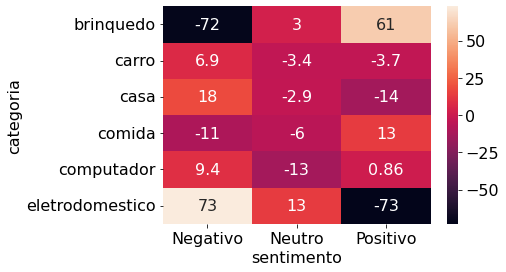

In [30]:
ax = sn.heatmap(std_residue_categoria_sentimento, annot=True)

In [10]:
table_categoria_nota = pd.crosstab(data['categoria'], 
                            data['nota'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_categoria_nota )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0

(13367.994872436706, 0.05, 0.0, True)

In [47]:
chi2_spy, p, dof, expect = chi2_contingency(table_categoria_nota)
chi2_spy, p, dof, expect

(13367.994872436706,
 0.0,
 20,
 array([[25476.06435804,  4665.88958418,  8299.15027001, 15744.31928581,
         30097.57650196],
        [  796.77877683,   145.92841906,   259.56076684,   492.4127717 ,
           941.31926556],
        [ 4191.55208586,   767.67427434,  1365.45112056,  2590.39753611,
          4951.92498312],
        [  895.62045362,   164.03107196,   291.75969353,   553.4973606 ,
          1058.09142028],
        [ 5613.7236128 ,  1028.14210882,  1828.74148778,  3469.30576482,
          6632.08702579],
        [ 7804.26071284,  1429.33454165,  2542.33666127,  4823.06728095,
          9220.00080329]]))

In [28]:
table = sm.stats.Table(table_categoria_nota)
std_residue_categoria_nota = table.standardized_resids

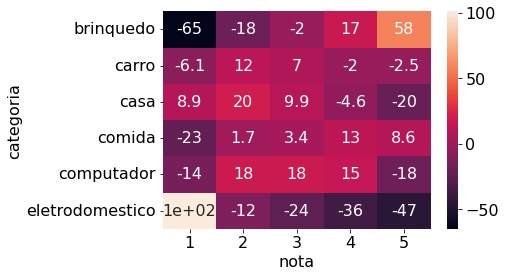

In [32]:
ax = sn.heatmap(std_residue_categoria_nota, annot=True)

In [11]:
table_nota_sentimento = pd.crosstab(data['nota'], 
                            data['sentimento'],
                                margins = False)

chi2_statistic, p_value, dof, ex = stats.chi2_contingency( table_nota_sentimento )
reject_H0 = p_value < alpha
chi2_statistic, alpha, p_value, reject_H0

(58078.029533322784, 0.05, 0.0, True)

In [48]:
chi2_spy, p, dof, expect = chi2_contingency(table_nota_sentimento)
chi2_spy, p, dof, expect

(58078.029533322784,
 0.0,
 8,
 array([[ 9772.32847307,  5216.84556501, 29788.82596193],
        [ 1789.78216552,   955.45469826,  5455.76313622],
        [ 3183.45963278,  1699.45344269,  9704.08692453],
        [ 6039.3417713 ,  3224.03339409, 18409.62483462],
        [11545.08795734,  6163.21289996, 35192.6991427 ]]))

In [27]:
table = sm.stats.Table(table_nota_sentimento)
std_residue_nota_sentimento = table.standardized_resids

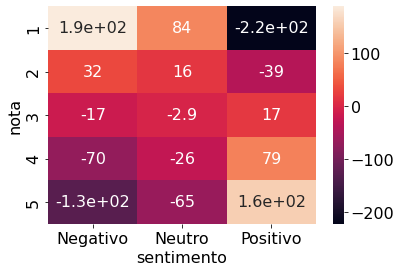

In [31]:
ax = sn.heatmap(std_residue_nota_sentimento, annot=True)

In [12]:
print(table_categoria_sentimento)
print(table_categoria_nota)
print(table_nota_sentimento)

sentimento       Negativo  Neutro  Positivo
categoria                                  
brinquedo           12758   10005     61520
carro                 721     251      1664
casa                 3858    1510      8499
comida                411     242      2310
computador           4548    1617     12407
eletrodomestico     10034    3634     12151
nota                 1     2     3      4      5
categoria                                       
brinquedo        19789  3878  8187  17015  35414
carro              654   284   366    452    880
casa              4649  1276  1696   2390   3856
comida             331   185   346    821   1280
computador        4776  1543  2508   4221   5524
eletrodomestico  14579  1035  1484   2774   5947
sentimento  Negativo  Neutro  Positivo
nota                                  
1              23493    9994     11291
2               2949    1409      3843
3               2386    1593     10608
4               1694    1967     24012
5               1808  

<AxesSubplot:>

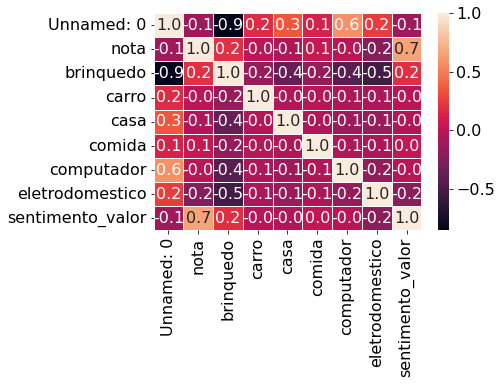

In [49]:
correlation = data.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [33]:
mca = prince.MCA()

mca = mca.fit(data[['categoria', 'sentimento', 'nota_escrita']])

In [34]:
mca.row_coordinates(data[['categoria', 'sentimento', 'nota_escrita']])

,0,1
0,-0.729342,-0.484567
1,0.991162,-0.244086
2,-0.675789,-0.017410
3,-0.675789,-0.017410
4,-0.729342,-0.484567
...,...,...
148135,0.220718,1.186310
148136,0.220718,1.186310
148137,0.220718,1.186310
148138,-0.588949,0.449344


In [35]:
mca.column_coordinates(data[['categoria', 'sentimento', 'nota_escrita']])

,0,1
categoria_brinquedo,-0.351758,-0.344697
categoria_carro,0.068012,1.583593
categoria_casa,0.292676,1.151762
categoria_comida,-0.714787,0.638576
categoria_computador,-0.027456,1.373900
categoria_eletrodomestico,1.085915,-0.716599
sentimento_Negativo,1.388840,0.240282
sentimento_Neutro,0.782940,-0.329069
sentimento_Positivo,-0.592728,-0.021196
nota_escrita_Alta,-0.616560,0.333855


In [11]:
#mca = prince.MCA()

for i in range(len(data['nota'])):
    if data['nota'][i] == 5:
        data['nota_escrita'][i] = 'Muito Alta'
    if data['nota'][i] == 4:
        data['nota_escrita'][i] = 'Alta'
    if data['nota'][i] == 3:
        data['nota_escrita'][i] = 'Neutra'
    if data['nota'][i] == 2:
        data['nota_escrita'][i] = 'Baixa'
    if data['nota'][i] == 1:
        data['nota_escrita'][i] = 'Muito Baixa'
        
#mca = mca.fit(data[['categoria', 'sentimento', 'nota_escrita']]) # same as calling ca.fs_r(1)

C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/558382949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nota_escrita'][i] = 'Muito Alta'
C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/558382949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nota_escrita'][i] = 'Neutra'
C:\Users\Yuri\AppData\Local\Temp/ipykernel_600/558382949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nota_escrita'][i] = 'Muito Baix

In [13]:
data.to_csv('tudo_final.csv')

Text(0.5, 0, 'Componente 0 (59.29% inércia)')

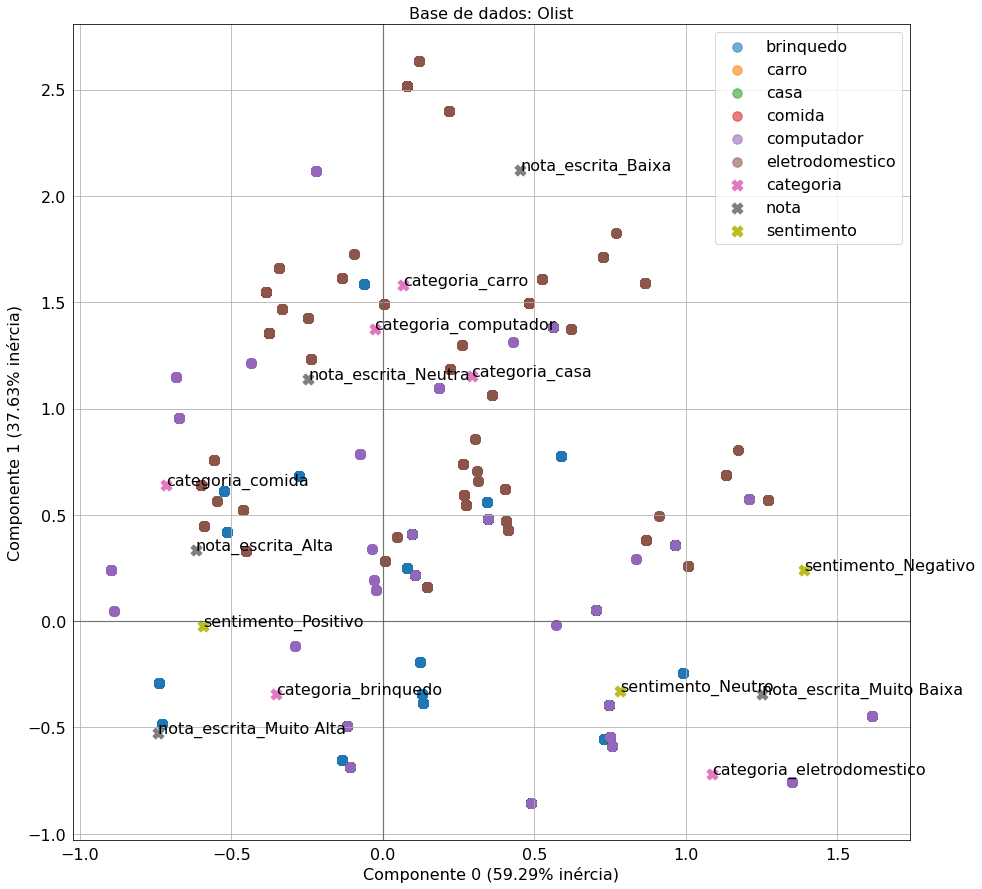

In [145]:
import matplotlib

matplotlib.rcParams.update({'font.size': 16})

groups = ['brinquedo']*cBrinq + ['carro']*cCarro + ['casa']*cCasa + ['computador']*cCompu + ['eletrodomestico']*cEletr + ['comida']*cComid
ax = mca.plot_coordinates(
     X=data[['categoria', 'nota_escrita', 'sentimento']],
     ax=None,
     figsize=(15, 15),
     show_row_points=True,
     row_points_size=90,
     show_row_labels=False,
     row_groups=groups,
     show_column_points=True,
     column_points_size=120,
     show_column_labels=True,
     legend_n_cols=1
     )
ax.set_title('Base de dados: Olist', fontsize = 16)
ax.set_ylabel('Componente 1 (' + str(round((mca.eigenvalues_[1]*100), 2)) + "% inércia)", fontsize = 16)
ax.set_xlabel('Componente 0 (' + str(round((mca.eigenvalues_[0]*100), 2)) + "% inércia)", fontsize = 16)

#ax.get_figure().savefig('images/mca_coordinates.svg')

In [ ]:
# Testes de programação a serem descartados

In [8]:
import prince
?prince.MCA.plot_coordinates


In [28]:
import mca
mca_df = data

mca_counts = mca.MCA(data[['brinquedo', 'casa', 'carro', 'computador', 'eletrodomestico', 'comida', 'nota', 'sentimento']])
print(mca_counts.fs_r(1))

MemoryError: Unable to allocate 164. GiB for an array with shape (148140, 148140) and data type float64

In [20]:
mca1 = mca.transform(data) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)

MemoryError: Unable to allocate 92.6 GiB for an array with shape (138957, 715883) and data type uint8

In [19]:
ax = mca.plot_coordinates(
     X=data,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure().savefig('images/mca_coordinates.svg')

AttributeError: 'DataFrame' object has no attribute 'plot_coordinates'

In [8]:
!pip install prince --upgrade

In [14]:
from sklearn.model_selection import train_test_split
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['nota']
    
    # One-Hot Encoding of Categorical Variables
    #df = pd.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['nota'].sort_values(ascending=False)
    
    # Maintain the top 5 most correlation features with Grade
    most_correlated = most_correlated[:7]
    
    df = df.loc[:, most_correlated.index]
    #df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = format_data(data[['categoria', 'nota', 'sentimento']])
X_train.head()
#data.head()

,nota
17825,4
5357,5
17605,4
24136,4
22251,5


In [23]:
!pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6031 sha256=cde32afa74d862145411c1491f6ae7d1d64b5d67b7e8b9fae9c0b1b31059a13b
  Stored in directory: c:\users\yuri\appdata\local\pip\cache\wheels\2c\91\5a\fa081d100d93bc10099842be0574697300749906f067c673b2
Successfully built mca
